In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import math
from datetime import timedelta, datetime
import plotly.express as px
from geolib import geohash


df = pd.read_csv("../examples/Vehicles Dataset/data/vehicles_preapred.zip").sort_values(by=["tid", 't'])

df.tid -= df.tid.min()

df.c1 = df.c1/100000
df.c2 = df.c2/100000

df.head()

,tid,class,t,c1,c2
0,0,B,0,42.077160,4.738411
1,0,B,30,42.077246,4.739088
2,0,B,60,42.077259,4.739096
3,0,B,90,42.077369,4.739158
4,0,B,120,42.077635,4.739343


In [3]:
precision =  5 #da 1 a 12

df["geohash"] = [geohash.encode(x[0], x[1], precision) for x in tqdm(df[["c1", "c2"]].values)]

decodes = dict()

for gh in tqdm(df.geohash.unique()):
    decodes[gh] = geohash.bounds(gh)

l = []
prec = "!"
c = -1
for gh in df.geohash:
    if gh != prec:
        prec = gh
        c += 1
    l.append(gh+"_"+str(c))

df["geohash2"] = l

df["lat_norm"] = df.c1 - df.geohash.transform(lambda x: decodes[x].sw.lat)
df["lon_norm"] = df.c2 - df.geohash.transform(lambda x: decodes[x].sw.lon)

  0%|          | 0/178299 [00:00<?, ?it/s]

  0%|          | 0/141 [00:00<?, ?it/s]

In [6]:
df[df.tid==0]

,tid,class,t,c1,c2,geohash,geohash2,lat_norm,lon_norm
0,0,B,0,42.077160,4.738411,sp7r7,sp7r7_0,0.021496,0.036263
1,0,B,30,42.077246,4.739088,sp7r7,sp7r7_0,0.021582,0.036940
2,0,B,60,42.077259,4.739096,sp7r7,sp7r7_0,0.021595,0.036948
3,0,B,90,42.077369,4.739158,sp7r7,sp7r7_0,0.021705,0.037010
4,0,B,120,42.077635,4.739343,sp7r7,sp7r7_0,0.021971,0.037195
...,...,...,...,...,...,...,...,...,...
104,0,B,4380,42.203285,4.860408,spe2n,spe2n_6,0.015785,0.026424
105,0,B,4410,42.203264,4.860408,spe2n,spe2n_6,0.015764,0.026424
106,0,B,4620,42.203119,4.861005,spe2n,spe2n_6,0.015619,0.027021
107,0,B,4650,42.203242,4.860988,spe2n,spe2n_6,0.015742,0.027004


In [14]:
df_np = df[df.tid == 0].values

for row in df_np:
    row[-2] = row[3]-geohash.bounds(row[5]).sw.lat
    row[-1] = row[4]-geohash.bounds(row[5]).sw.lon
    
df_tid = pd.DataFrame(df_np, columns=df.columns)

df_tid.head()

,tid,class,t,c1,c2,geohash,geohash2,lat_norm,lon_norm
0,0,B,0,42.07716,4.738411,sp7r7,sp7r7_0,0.021496,0.036263
1,0,B,30,42.077246,4.739088,sp7r7,sp7r7_0,0.021582,0.03694
2,0,B,60,42.077259,4.739096,sp7r7,sp7r7_0,0.021595,0.036948
3,0,B,90,42.077369,4.739158,sp7r7,sp7r7_0,0.021705,0.03701
4,0,B,120,42.077635,4.739343,sp7r7,sp7r7_0,0.021971,0.037195


In [13]:
plt.rcParams['figure.figsize'] = [9.0, 7.0]
plt.rcParams['figure.dpi'] = 250
plt.rcParams.update({'font.size': 14})

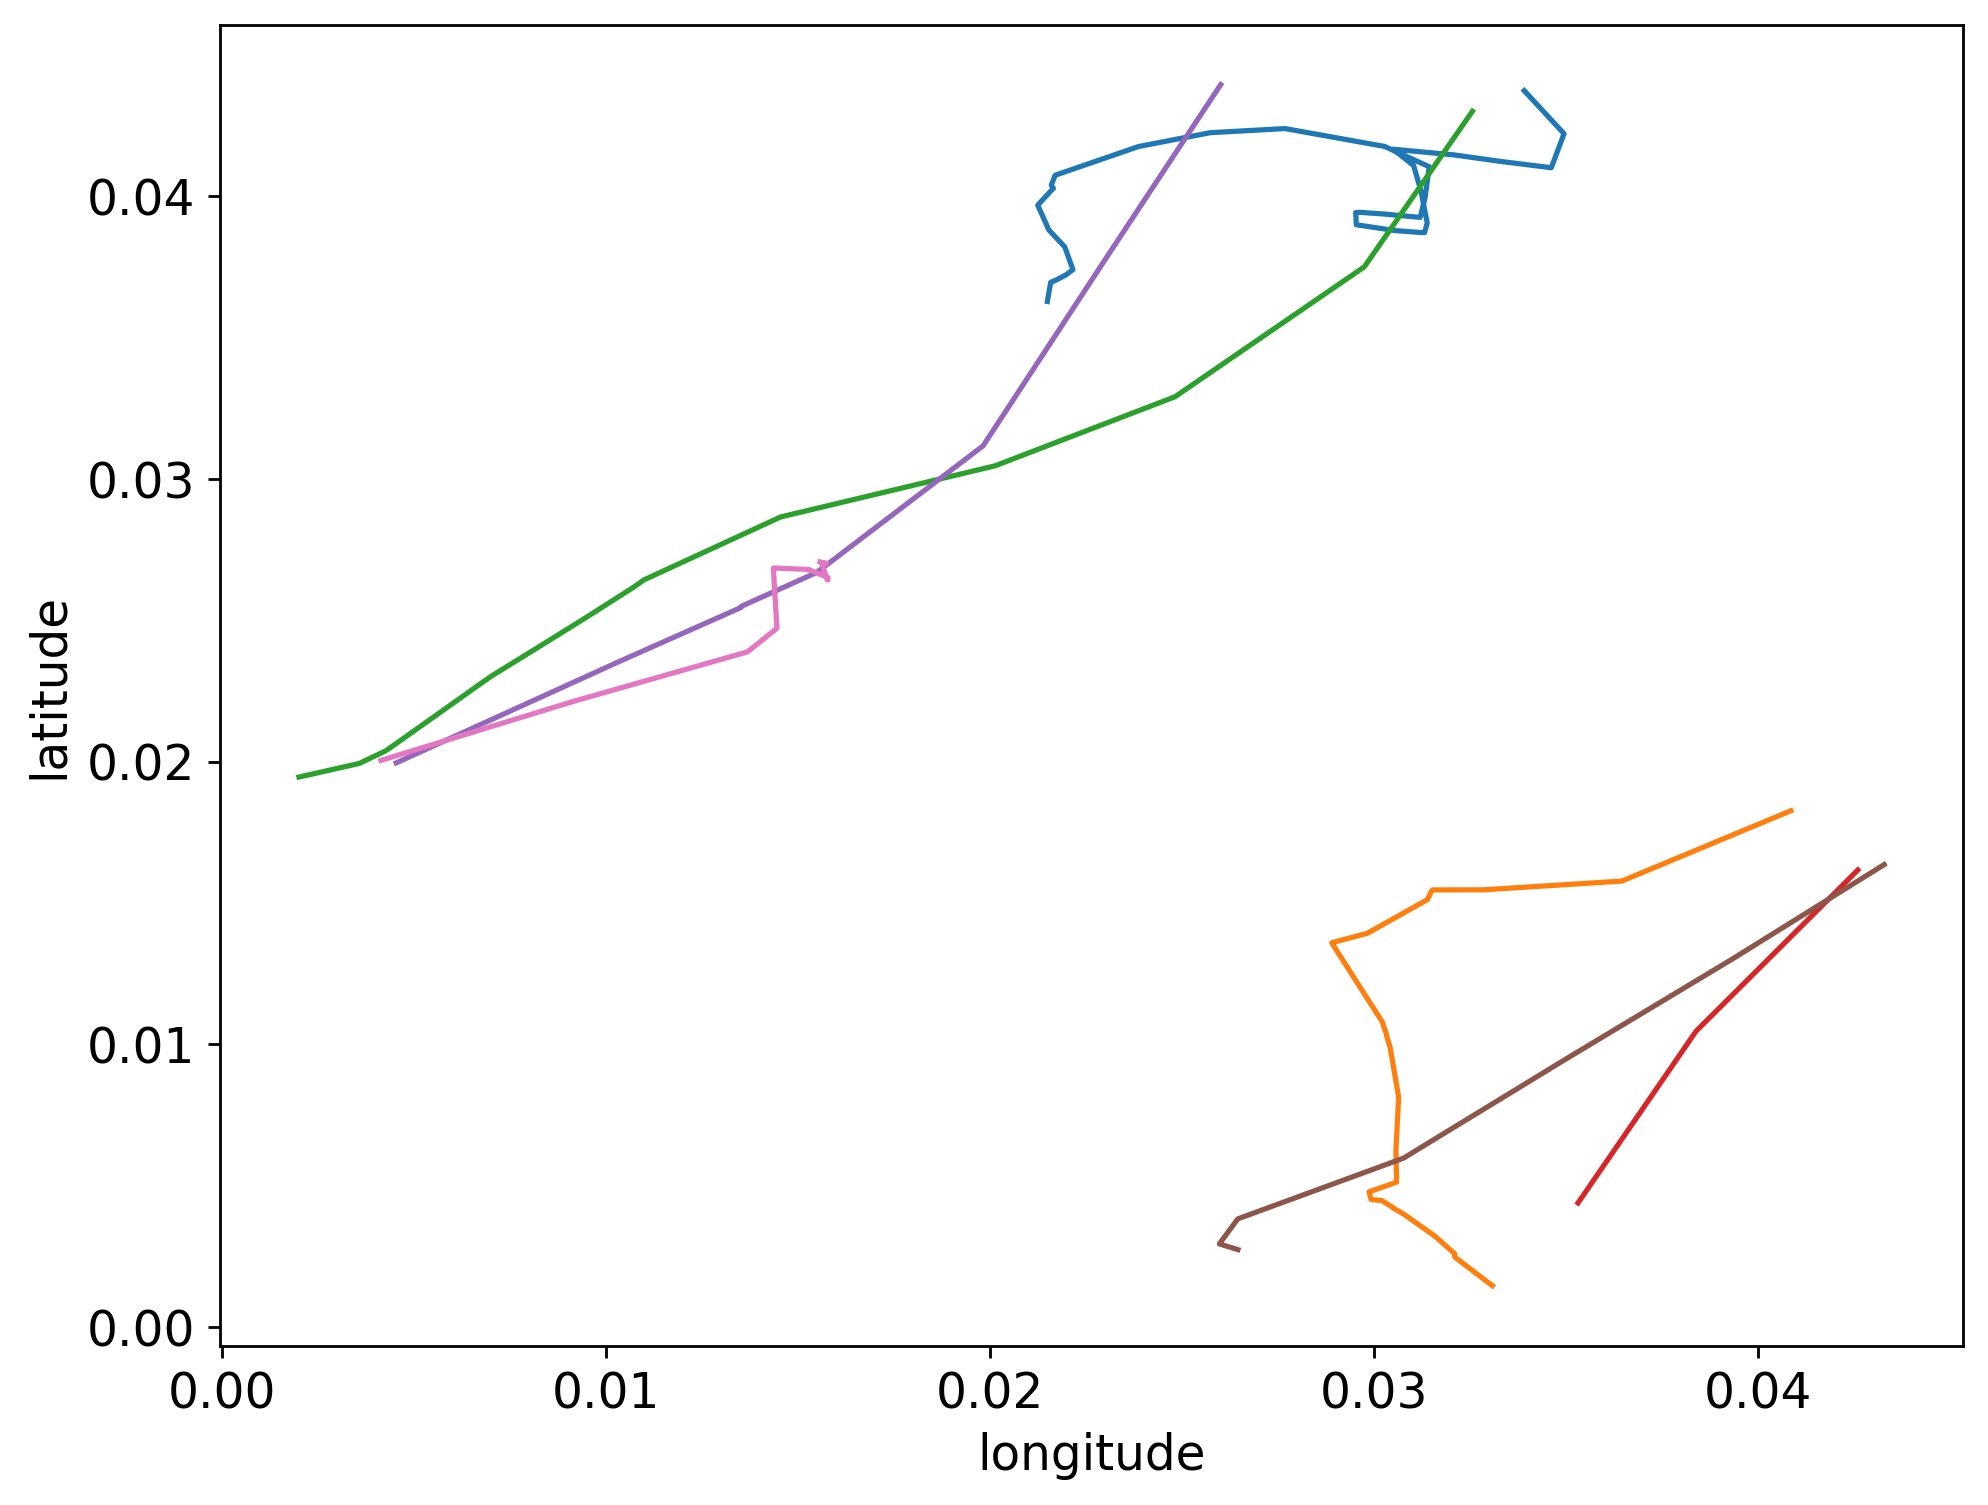

In [23]:
for gh in df_tid.geohash2.unique():
    plt.plot(df_tid[(df_tid.geohash2 == gh)].lat_norm, df_tid[(df_tid.geohash2 == gh)].lon_norm)

plt.ylabel("latitude")
plt.xlabel("longitude")

plt.savefig("tr geohash norm.pdf")

In [18]:
df_np = df[df.tid == 0].values

prec_row = [-1 for x in df_np[0]]

for row in df_np:
    if row[6] != prec_row[6]:
        prec_row = row
    row[-2] = row[3]-prec_row[3]
    row[-1] = row[4]-prec_row[4]
    
df_tid_fp = pd.DataFrame(df_np, columns=df.columns)

df_tid_fp.head()

,tid,class,t,c1,c2,geohash,geohash2,lat_norm,lon_norm
0,0,B,0,42.07716,4.738411,sp7r7,sp7r7_0,0.0,0.0
1,0,B,30,42.077246,4.739088,sp7r7,sp7r7_0,0.000086,0.000677
2,0,B,60,42.077259,4.739096,sp7r7,sp7r7_0,0.000099,0.000685
3,0,B,90,42.077369,4.739158,sp7r7,sp7r7_0,0.000209,0.000747
4,0,B,120,42.077635,4.739343,sp7r7,sp7r7_0,0.000475,0.000932


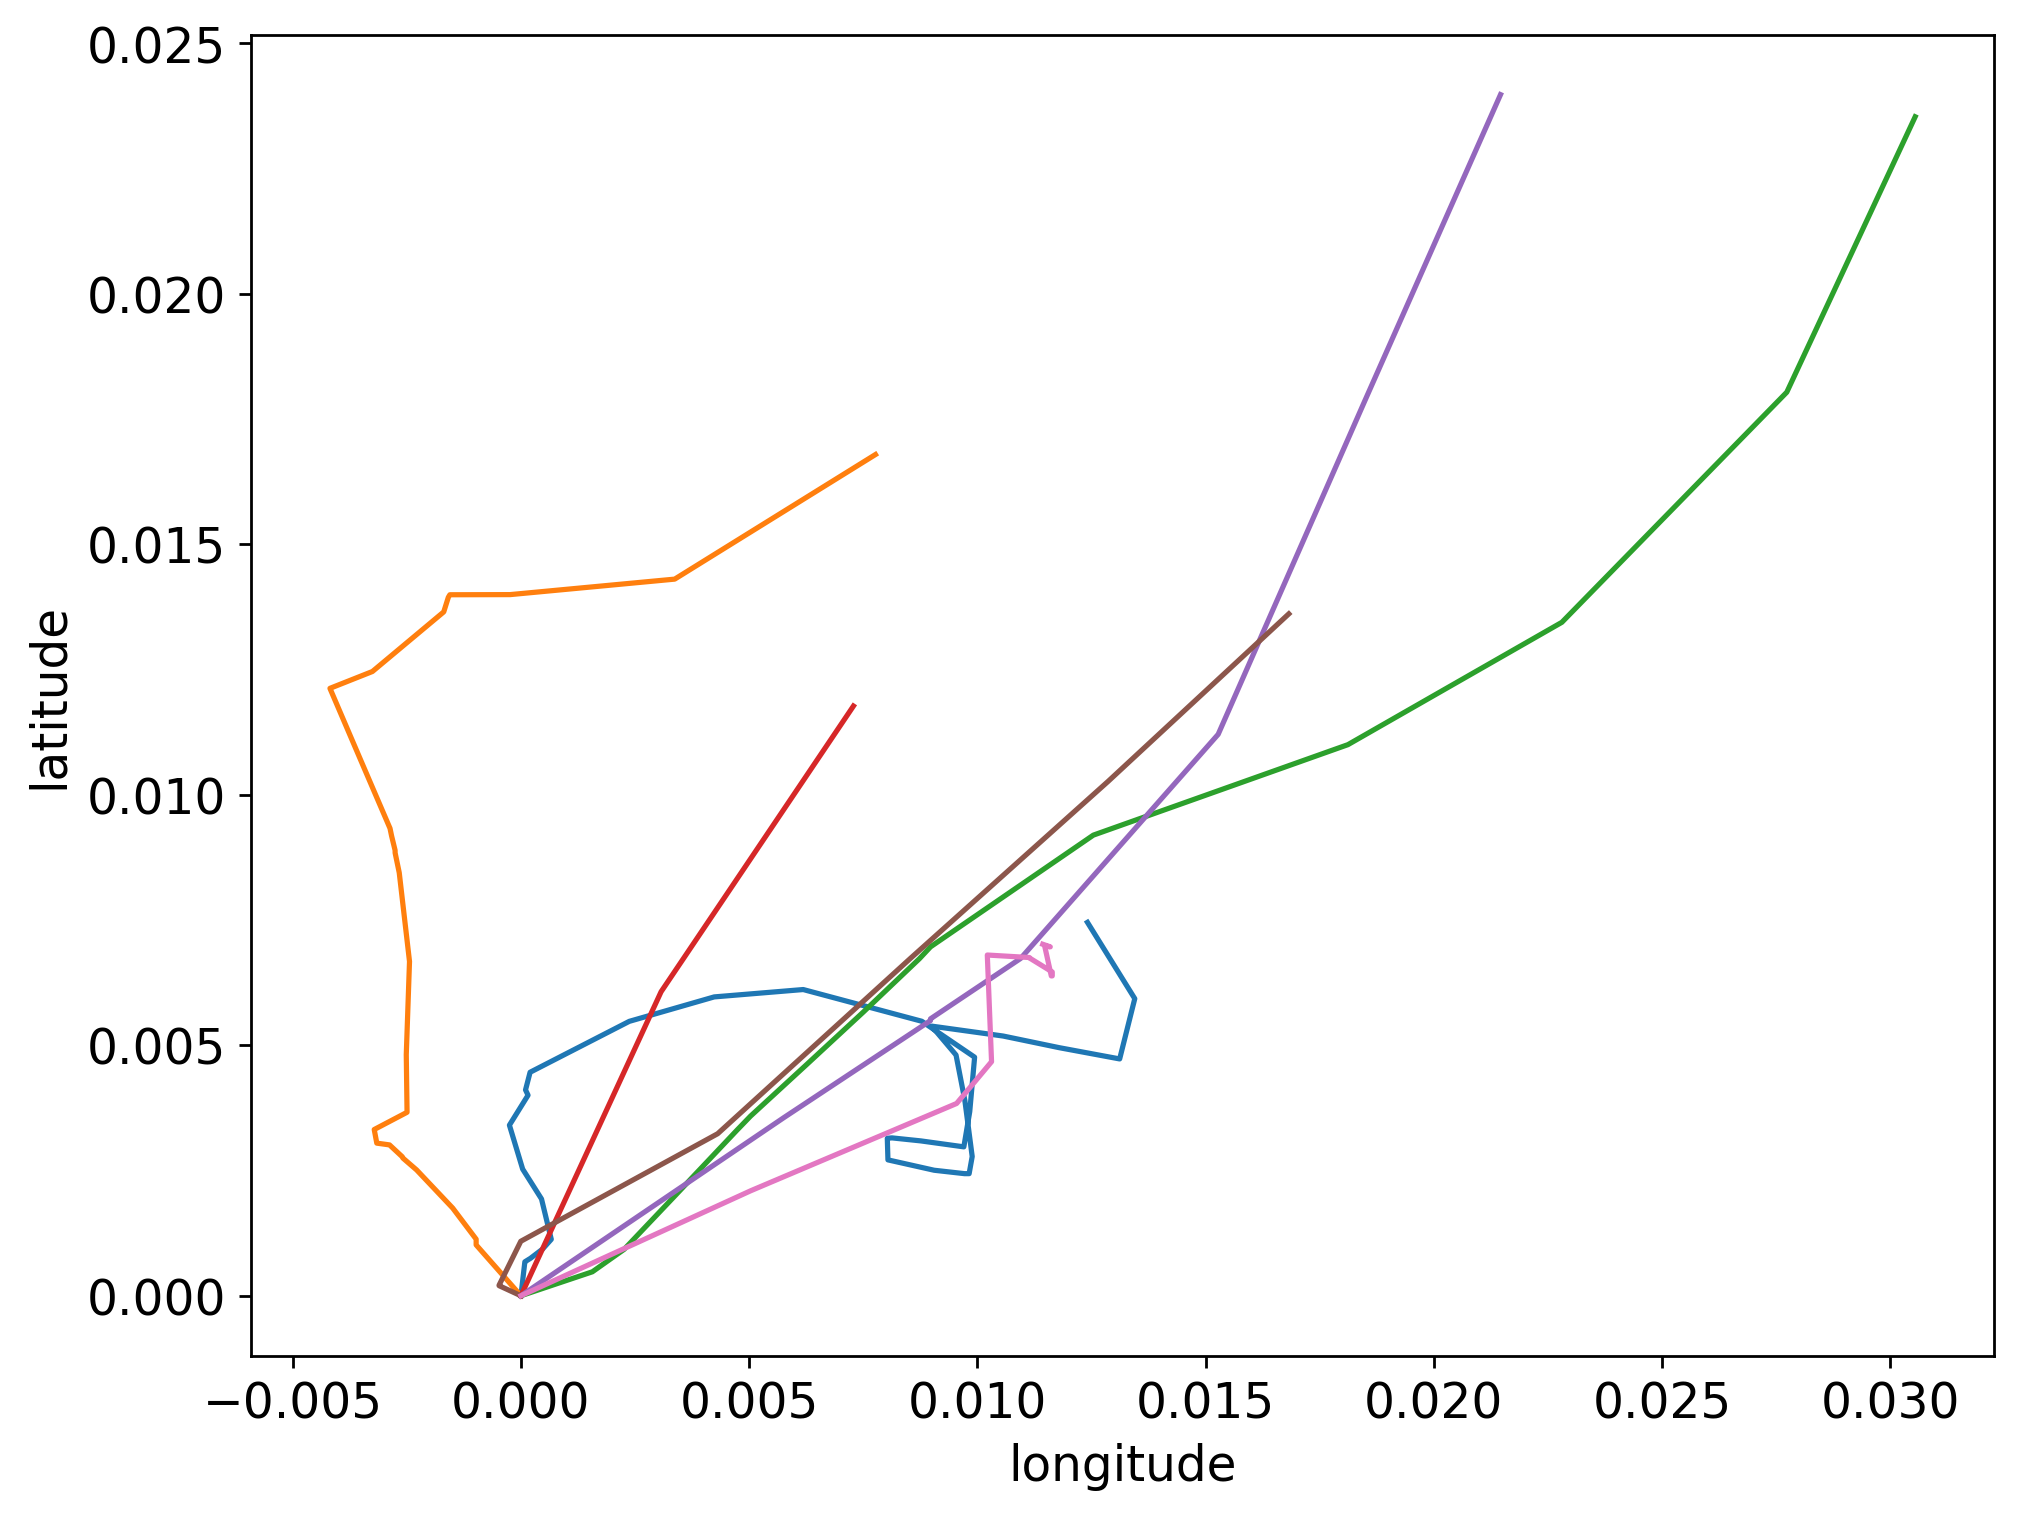

In [22]:
for gh in df_tid_fp.geohash2.unique():
    plt.plot(df_tid_fp[(df_tid_fp.geohash2 == gh)].lat_norm, df_tid_fp[(df_tid_fp.geohash2 == gh)].lon_norm)

plt.ylabel("latitude")
plt.xlabel("longitude")

plt.savefig("tr firstpoint norm.pdf")